<a href="https://colab.research.google.com/github/sudharshanpaul/Deep-Learning/blob/main/SelfOrganizingMaps/CreditCardApplication_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Self Organizing Maps

#### Importing the libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Importing the dataset

In [33]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [34]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

#### Feature Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

### Training the SOM

In [24]:
pip install MiniSom

In [36]:
from minisom import MiniSom

In [37]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### Visualizing the result

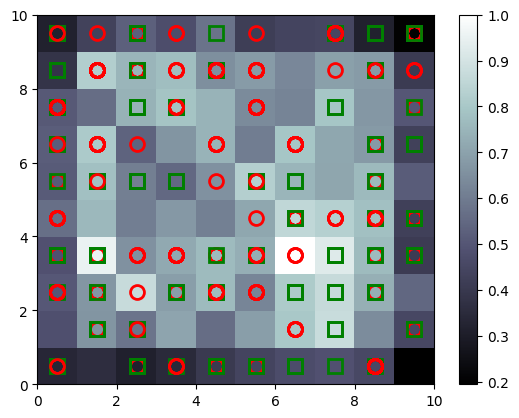

In [38]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()


### Finding the Frauds

In [29]:
mappings = som.win_map(X)

In [42]:
a = np.array(mappings[(7, 3)])
b = np.array(mappings[(3, 3)])

# Only continue if b is not empty
if b.size != 0:
    if b.ndim == 1:
        b = b.reshape(1, -1)
    frauds = np.concatenate((a, b), axis=0)
else:
    frauds = a

In [43]:
frauds = sc.inverse_transform(frauds)

In [45]:
np.set_printoptions(suppress=True)
print(frauds)

[[15790254.           0.          18.92         9.           2.
         6.           4.           0.75         1.           1.
         2.           0.           2.          88.         592.   ]
 [15768600.           0.          22.42         5.665        2.
        11.           4.           2.585        1.           1.
         7.           0.           2.         129.        3258.   ]
 [15748552.           0.          30.67        12.           2.
         8.           4.           2.           1.           1.
         1.           0.           2.         220.          20.   ]
 [15801441.           0.          35.75         0.915        2.
         6.           4.           0.75         1.           1.
         4.           0.           2.           0.        1584.   ]
 [15708714.           0.          18.75         7.5          2.
        11.           4.           2.71         1.           1.
         5.           0.           2.         184.       26727.   ]
 [15771856.         